In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
import pandas as pd
df = pd.read_csv("Bone Tumor Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            500 non-null    object
 1   Sex                   500 non-null    object
 2   Age                   500 non-null    int64 
 3   Grade                 500 non-null    object
 4   Histological type     500 non-null    object
 5   MSKCC type            500 non-null    object
 6   Site of primary STS   500 non-null    object
 7   Status (NED, AWD, D)  500 non-null    object
 8   Treatment             500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB


In [7]:
df.isna().sum()


Patient ID              0
Sex                     0
Age                     0
Grade                   0
Histological type       0
MSKCC type              0
Site of primary STS     0
Status (NED, AWD, D)    0
Treatment               0
dtype: int64

In [8]:
print(df['MSKCC type'].unique())

['Leiomyosarcoma' 'MFH' 'Synovial sarcoma']


In [9]:
df['Patient ID'].unique()

array(['STS_022', 'STS_034', 'STS_015', 'STS_037', 'STS_023', 'STS_041',
       'STS_011', 'STS_012', 'STS_003', 'STS_039', 'STS_048', 'STS_002',
       'STS_020', 'STS_005', 'STS_031', 'STS_021', 'STS_024', 'STS_029'],
      dtype=object)

In [10]:
df[df['Patient ID'] == 'STS_015']

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
3,STS_015,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
37,STS_015,Female,66,Intermediate,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
43,STS_015,Female,53,Intermediate,pleiomorphic leiomyosarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
68,STS_015,Female,57,Intermediate,myxofibrosarcoma,Leiomyosarcoma,left buttock,NED,Radiotherapy + Surgery
82,STS_015,Female,61,Intermediate,leiomyosarcoma,Leiomyosarcoma,right buttock,NED,Radiotherapy + Surgery
85,STS_015,Female,71,Intermediate,pleiomorphic leiomyosarcoma,Synovial sarcoma,left thigh,D,Surgery + Chemotherapy
95,STS_015,Male,68,High,pleiomorphic spindle cell undifferentiated,Leiomyosarcoma,left thigh,D,Radiotherapy + Surgery
121,STS_015,Female,58,Intermediate,pleiomorphic leiomyosarcoma,MFH,left biceps,NED,Radiotherapy + Surgery
125,STS_015,Female,80,Intermediate,pleiomorphic leiomyosarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
129,STS_015,Male,69,High,myxofibrosarcoma,Synovial sarcoma,right parascapusular,AWD,Surgery + Chemotherapy


In [11]:
import numpy as np
from fractions import Fraction
df_pl = df[df['Histological type'] == 'pleiomorphic leiomyosarcoma']

gender_counts = df_pl['Sex'].value_counts()
female_count = gender_counts['Female']
male_count = gender_counts['Male']
gender_ratio =  Fraction(male_count, female_count)

print("\nGender Occurrences for Leiomyosarcoma")
for gender, count in gender_counts.items():
    print(f"{gender}: {count} cases")
print(f"\nMale-to-Female Ratio for Pleiomorphic Leiomyosarcoma: {gender_ratio}") 

unique_values_counts = df_pl['Grade'].value_counts()
print("\nPleiomorphic leiomyosarcoma")
for value, count in unique_values_counts.items():
     print(f"Grade {value}: {count} times")

gender_grouped = df_pl.groupby('Sex')
gender_stats = gender_grouped['Age'].agg([np.mean, np.std])

print("\nAge Prevalence for Pleiomorphic Leiomyosarcoma")
for gender, stats in gender_stats.iterrows():
    mean_age = stats['mean']
    std_deviation = stats['std']
    print(f"{gender} Age : {mean_age:.2f} ± {std_deviation:.2f}")


Gender Occurrences for Leiomyosarcoma
Female: 80 cases
Male: 24 cases

Male-to-Female Ratio for Pleiomorphic Leiomyosarcoma: 3/10

Pleiomorphic leiomyosarcoma
Grade Intermediate: 60 times
Grade High: 44 times

Age Prevalence for Pleiomorphic Leiomyosarcoma
Female Age : 65.21 ± 13.22
Male Age : 55.46 ± 15.55


/home/u203091/tmp/ipykernel_4013733/1366533718.py:21: FutureWarning: The provided callable <function mean at 0x7f4f8c1fb550> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  gender_stats = gender_grouped['Age'].agg([np.mean, np.std])
/home/u203091/tmp/ipykernel_4013733/1366533718.py:21: FutureWarning: The provided callable <function std at 0x7f4f8c1fb700> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'std' instead.
  gender_stats = gender_grouped['Age'].agg([np.mean, np.std])


/home/u203091/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203091/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/u203091/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203091/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

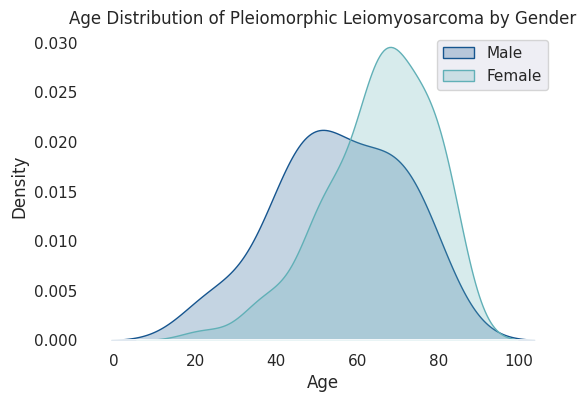

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
df_pl = df[df['Histological type'] == 'pleiomorphic leiomyosarcoma']

sns.set_style('whitegrid')
sns.set(font="sans-serif")

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_pl[df_pl['Sex'] == 'Male']['Age'], label='Male', color='#16558F', fill=True)
sns.kdeplot(data=df_pl[df_pl['Sex'] == 'Female']['Age'], label='Female', color='#61B0B7', fill=True)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Age Distribution of Pleiomorphic Leiomyosarcoma by Gender', fontsize=12)

plt.legend()

ax = plt.gca()
ax.set_facecolor('white')
ax.set_frame_on(True)

plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df_pl_pd = df_pl['Site of primary STS'].value_counts(normalize=True) * 100
rounded_percentage_distribution = df_pl_pd.round(2)
print(rounded_percentage_distribution)

Site of primary STS
left thigh              28.85
right thigh             21.15
left biceps             15.38
left buttock            12.50
parascapusular          11.54
right buttock            8.65
right parascapusular     1.92
Name: proportion, dtype: float64


In [14]:
df_l = df[df['Histological type'] == 'leiomyosarcoma']

gender_counts = df_l['Sex'].value_counts()
female_count = gender_counts['Female']
male_count = gender_counts['Male']
gender_ratio =  Fraction(male_count, female_count)

print("\nGender Occurrences for Leiomyosarcoma")
for gender, count in gender_counts.items():
    print(f"{gender}: {count} cases")
print(f"\nMale-to-Female Ratio for Leiomyosarcoma: {gender_ratio}") 
unique_values_counts = df_l['Grade'].value_counts()
print("\nLeiomyosarcoma")
for value, count in unique_values_counts.items():
    print(f"Grade {value}: {count} times")
gender_grouped = df_l.groupby('Sex')
gender_stats = gender_grouped['Age'].agg([np.mean, np.std])

print("\nAge Prevalence for Leiomyosarcoma")
for gender, stats in gender_stats.iterrows():
    mean_age = stats['mean']
    std_deviation = stats['std']
    print(f"{gender} Age : {mean_age:.2f} ± {std_deviation:.2f}")


Gender Occurrences for Leiomyosarcoma
Female: 35 cases
Male: 8 cases

Male-to-Female Ratio for Leiomyosarcoma: 8/35

Leiomyosarcoma
Grade Intermediate: 31 times
Grade High: 12 times

Age Prevalence for Leiomyosarcoma
Female Age : 61.49 ± 14.07
Male Age : 54.75 ± 16.84


/home/u203091/tmp/ipykernel_4013733/340804288.py:17: FutureWarning: The provided callable <function mean at 0x7f4f8c1fb550> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  gender_stats = gender_grouped['Age'].agg([np.mean, np.std])
/home/u203091/tmp/ipykernel_4013733/340804288.py:17: FutureWarning: The provided callable <function std at 0x7f4f8c1fb700> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'std' instead.
  gender_stats = gender_grouped['Age'].agg([np.mean, np.std])


In [15]:
df_l_pd = df_l['Site of primary STS'].value_counts(normalize=True) * 100
rounded_percentage_distribution = df_l_pd.round(2)
print(rounded_percentage_distribution)

Site of primary STS
right thigh       37.21
parascapusular    23.26
right buttock     11.63
left thigh        11.63
left buttock       9.30
left biceps        6.98
Name: proportion, dtype: float64


In [16]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


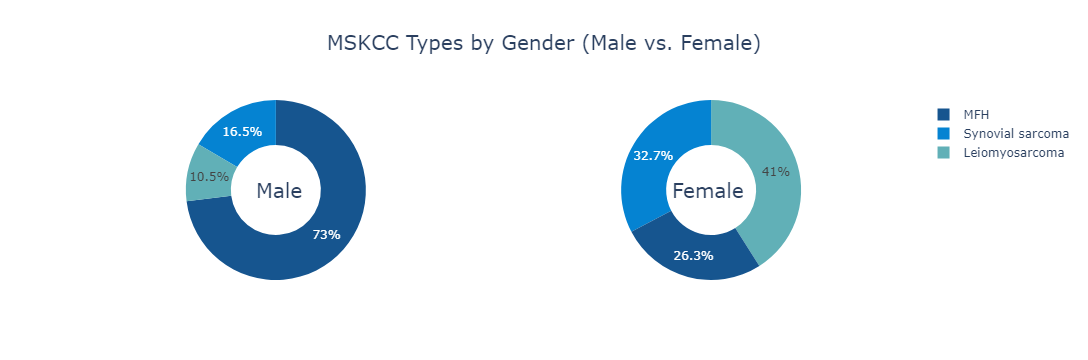

In [24]:
import plotly.graph_objs as go
import plotly.offline as pyo
def male_data():
    return df[df['Sex'] == 'Male']
def female_data():
    return df[df['Sex'] == 'Female']
male_data = df[df['Sex'] == 'Male']
female_data = df[df['Sex'] == 'Female']

male_mskcc_counts = male_data['MSKCC type'].value_counts()
female_mskcc_counts = female_data['MSKCC type'].value_counts()

categories = male_mskcc_counts.index

blue_palette = ['#16558F', '#0583D2', '#61B0B7']

data1 = {
    "values": male_mskcc_counts.loc[categories].values,
    "labels": categories,
    "domain": {"column": 0},
    "name": "Male MSKCC Type",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}

data2 = {
    "values": female_mskcc_counts.loc[categories].values,
    "labels": categories,
    "domain": {"column": 1},
    "name": "Female MSKCC Type",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}

data = [data1, data2]

layout = go.Layout(
    {
        "title": {
            "text": "MSKCC Types by Gender (Male vs. Female)",
            "font": {
                "size": 20
            },
            "x": 0.5  # Center the title
            },
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Male",
                "x": 0.21,
                "y": 0.5
            },
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Female",
                "x": 0.805,
                "y": 0.5
            }
        ]
    }
)

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)

In [25]:
pip install iplot


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement iplot (from versions: none)
ERROR: No matching distribution found for iplot
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install nbformat


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install nbformat>=4.2.0


Note: you may need to restart the kernel to use updated packages.


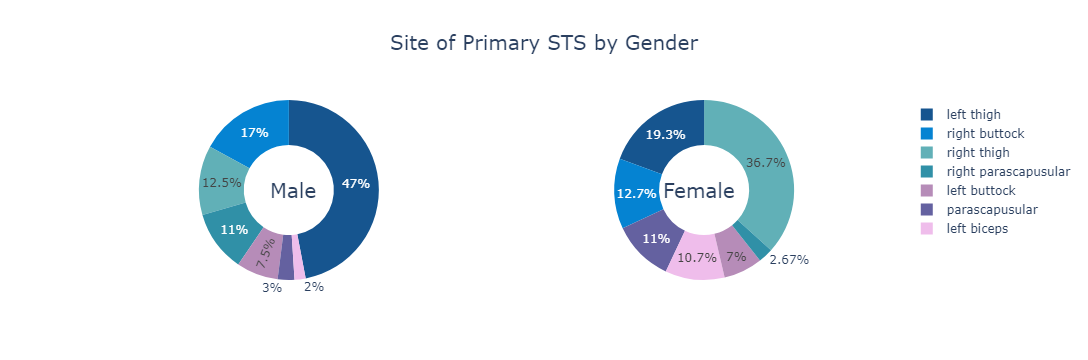

In [52]:
import plotly.graph_objs as go
import plotly.offline as pyo
def male_site_counts():
    return male_data['Site of primary STS'].value_counts()
def female_site_counts():
    return female_data['Site of primary STS'].value_counts()
male_counts = male_site_counts()
female_counts = female_site_counts()
categories = male_counts.index.tolist()
blue_palette = ['#16558F', '#0583D2', '#61B0B7', '#3090A7', '#B68CB8', '#6461A0', '#EFBDEB']
data1 = {
    "values": male_counts[categories].values,
    "labels": categories,
    "domain": {"column": 0},
    "name": "Male Site of primary STS",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}

data2 = {
    "values": female_counts[categories].values,
    "labels": categories,
    "domain": {"column": 1},
    "name": "Female Site of primary STS",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}

data = [data1, data2]

layout = go.Layout(
    {
        "title": {
            "text": "Site of Primary STS by Gender",
            "font": {
                "size": 20
                },
            "x": 0.5  # Center the title
        },
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Male",
                "x": 0.21,
                "y": 0.5
            },
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Female",
                "x": 0.805,
                "y": 0.5
            }
        ]
    }
)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [40]:
def male_data(df):
    return df[df['Sex'] == 'Male']

def female_data(df):
    return df[df['Sex'] == 'Female']
male_data = df[df['Sex'] == 'Male'] 
female_data = df[df['Sex'] == 'Female']

total_male_count = len(male_data)
total_female_count = len(female_data)

male_site_counts = male_data['Site of primary STS'].value_counts()
female_site_counts = female_data['Site of primary STS'].value_counts()

male_site_per = (male_site_counts / total_male_count) * 100
fem_site_per = (female_site_counts / total_female_count) * 100

print("Male Site of primary STS (Percentages):")
print(male_site_per)
print("\nFemale Site of primary STS (Percentages):")
print(fem_site_per)


Male Site of primary STS (Percentages):
Site of primary STS
left thigh              47.0
right buttock           17.0
right thigh             12.5
right parascapusular    11.0
left buttock             7.5
parascapusular           3.0
left biceps              2.0
Name: count, dtype: float64

Female Site of primary STS (Percentages):
Site of primary STS
right thigh             36.666667
left thigh              19.333333
right buttock           12.666667
parascapusular          11.000000
left biceps             10.666667
left buttock             7.000000
right parascapusular     2.666667
Name: count, dtype: float64


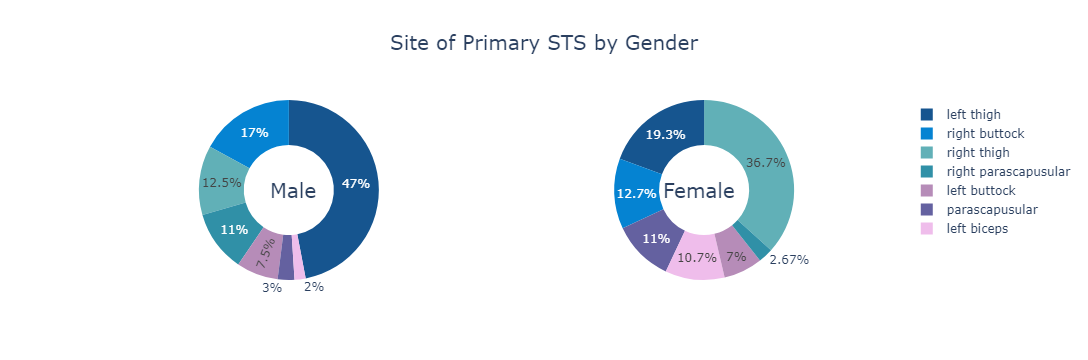

In [54]:
import plotly.graph_objs as go
import plotly.offline as pyo
male_site_counts = male_data['Site of primary STS'].value_counts()
female_site_counts = female_data['Site of primary STS'].value_counts()

categories = male_site_counts.index

blue_palette = ['#16558F', '#0583D2', '#61B0B7', '#3090A7', '#B68CB8', '#6461A0', '#EFBDEB']

data1 = {
    "values": male_site_counts.loc[categories].values,
    "labels": categories,
    "domain": {"column": 0},
    "name": "Male Site of primary STS",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}
data2 = {
    "values": female_site_counts.loc[categories].values,
    "labels": categories,
    "domain": {"column": 1},
    "name": "Female Site of primary STS",
    "hoverinfo": "label+percent+name",
    "hole": 0.5,
    "type": "pie",
    "marker": {"colors": blue_palette}  
}

data = [data1, data2]

layout = go.Layout(
    {
        "title": {
            "text": "Site of Primary STS by Gender",
            "font": {
                "size": 20
            },
            "x": 0.5  # Center the title
        },
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Male",
                "x": 0.21,
                "y": 0.5
            },
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Female",
                "x": 0.805,
                 "y": 0.5
            }
        ]
    }
)

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)